In [2]:
import numpy as np
import matplotlib.pyplot as plt

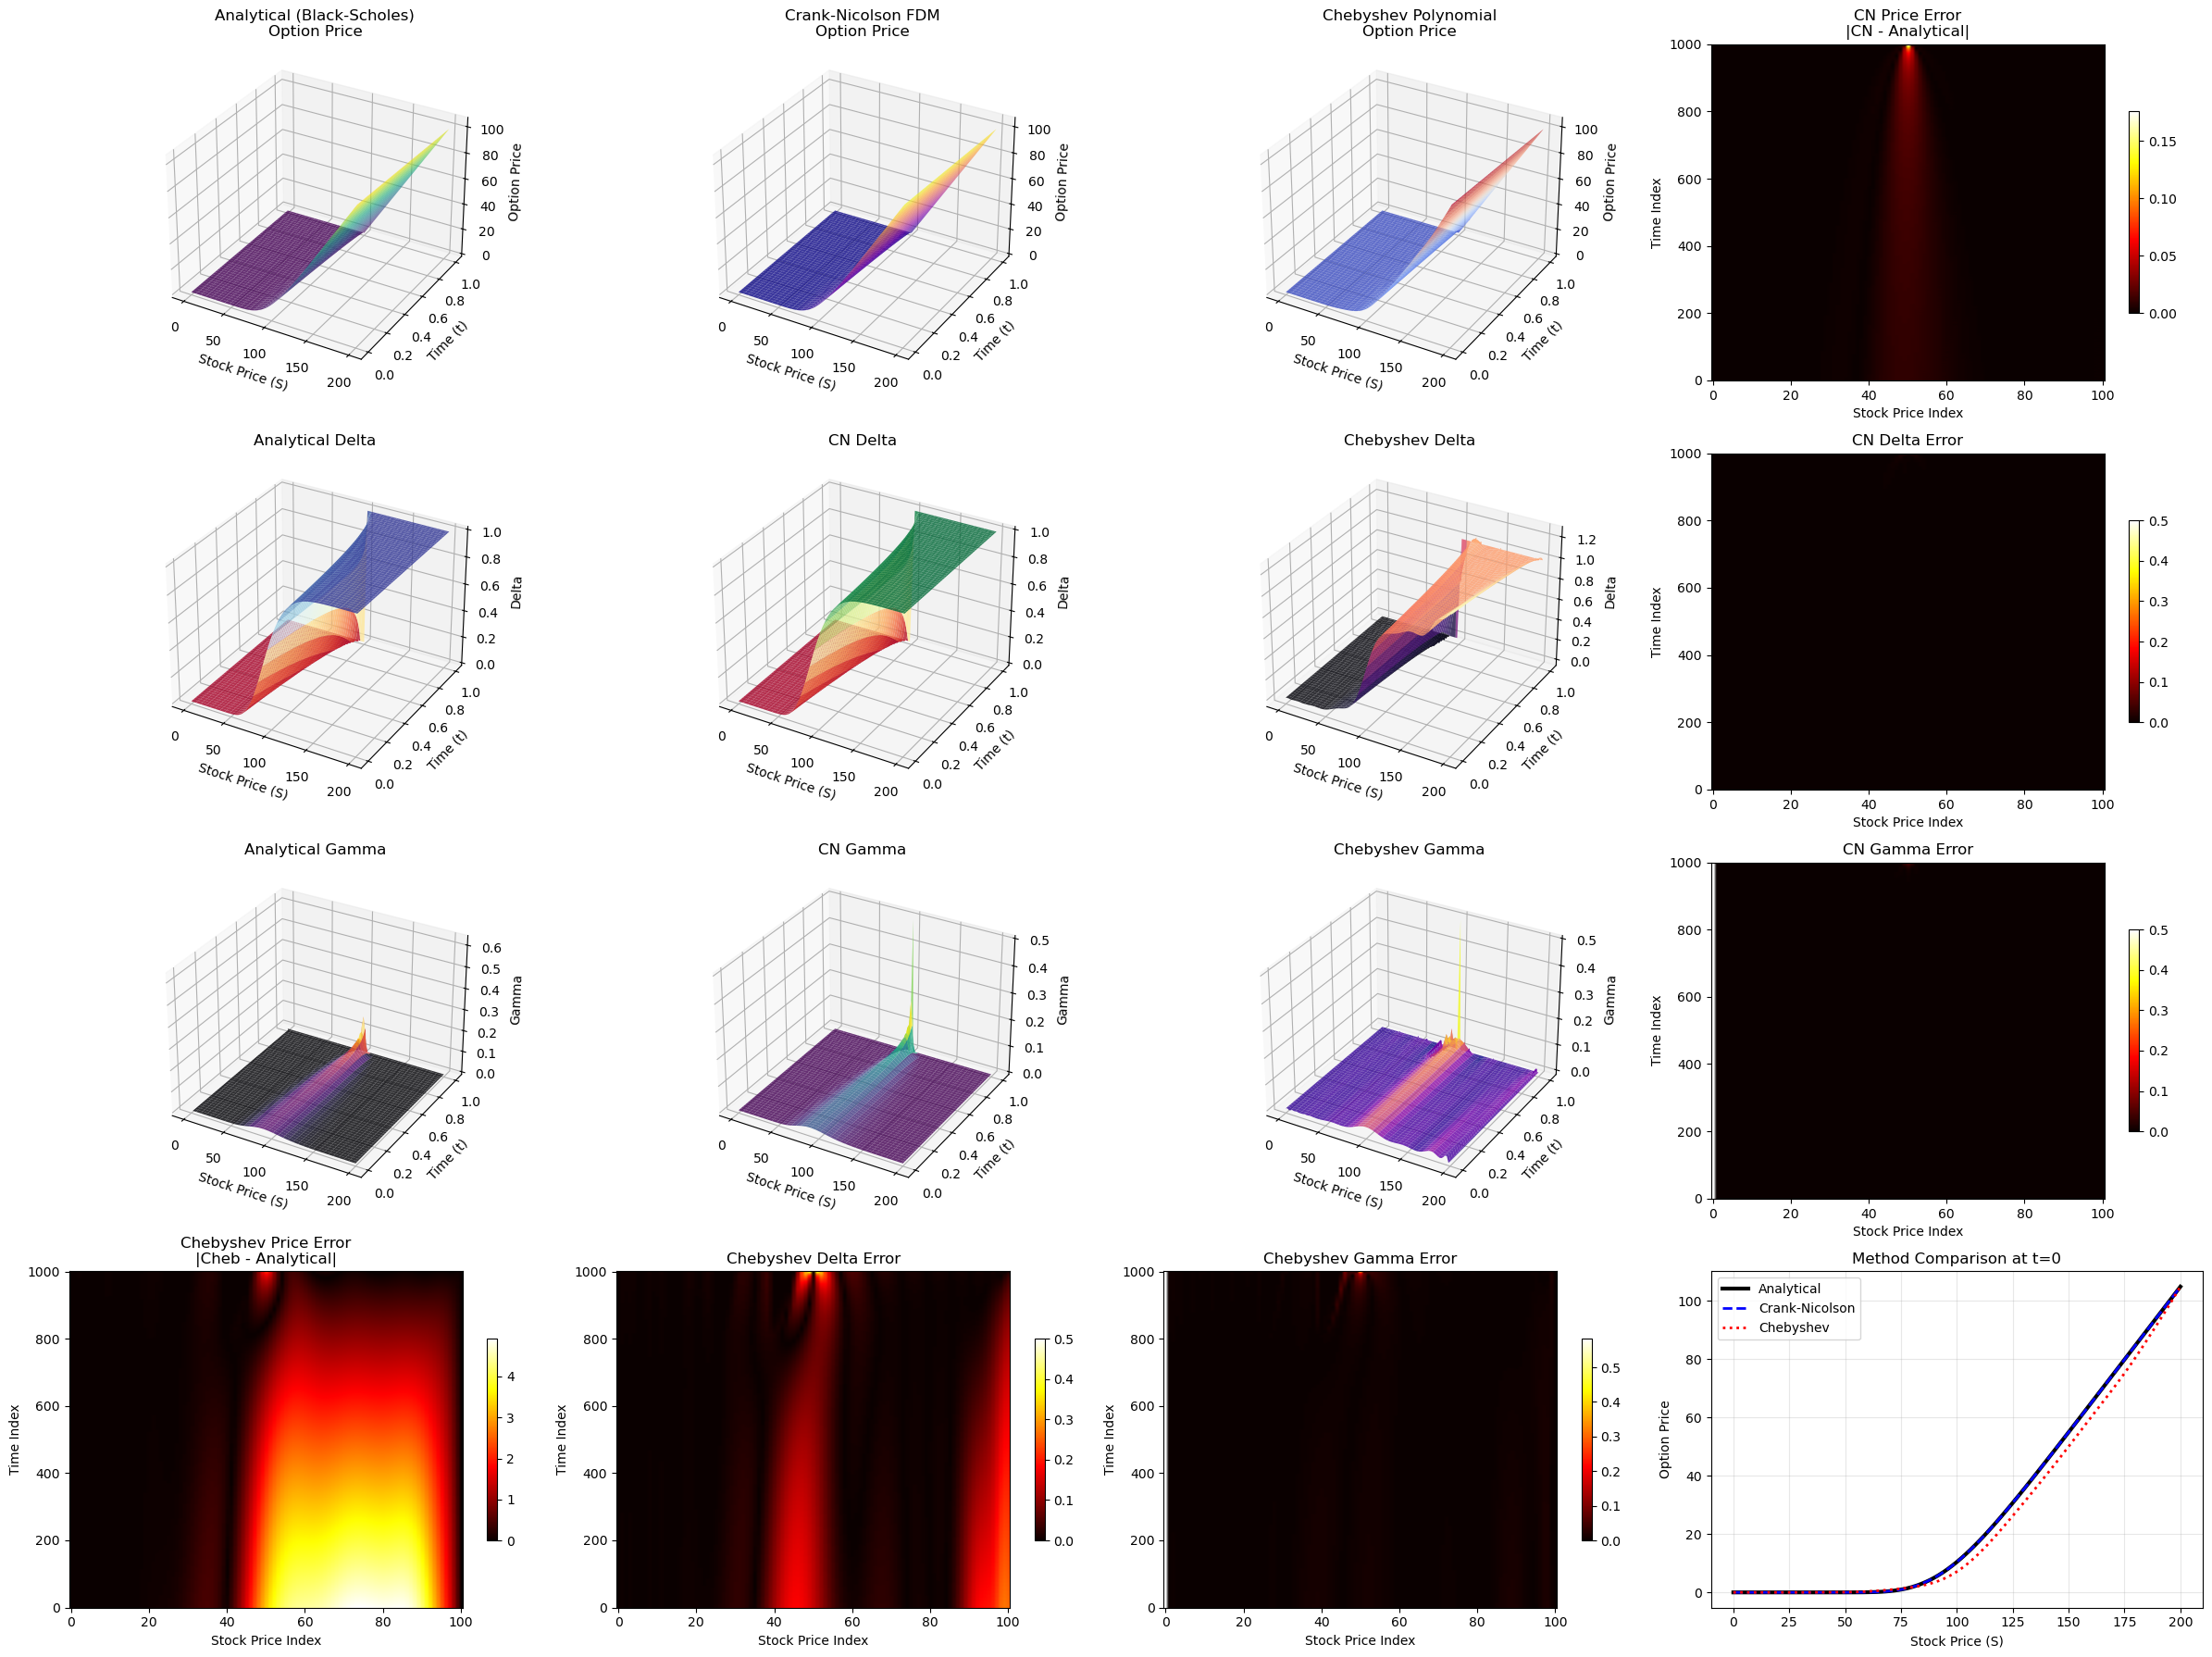

COMPREHENSIVE ERROR ANALYSIS

1. OPTION PRICE ERRORS:
----------------------------------------
Crank-Nicolson vs Analytical:
  Max Absolute Error:     0.17580300
  Mean Absolute Error:    0.00190346
  RMSE:                   0.00513631
  Mean Relative Error:    8.23235400

Chebyshev vs Analytical:
  Max Absolute Error:     4.92330000
  Mean Absolute Error:    1.16488759
  RMSE:                   1.81886781
  Mean Relative Error:    19391799.73551253

2. DELTA (∂V/∂S) ERRORS:
----------------------------------------
Crank-Nicolson vs Analytical:
  Max Absolute Error:     0.50000000
  Mean Absolute Error:    0.00012939
  RMSE:                   0.00163800

Chebyshev vs Analytical:
  Max Absolute Error:     0.50000000
  Mean Absolute Error:    0.03120749
  RMSE:                   0.05947751

3. GAMMA (∂²V/∂S²) ERRORS:
----------------------------------------
Crank-Nicolson vs Analytical:
  Max Absolute Error:     nan
  Mean Absolute Error:    nan
  RMSE:                   nan

Chebyshev v

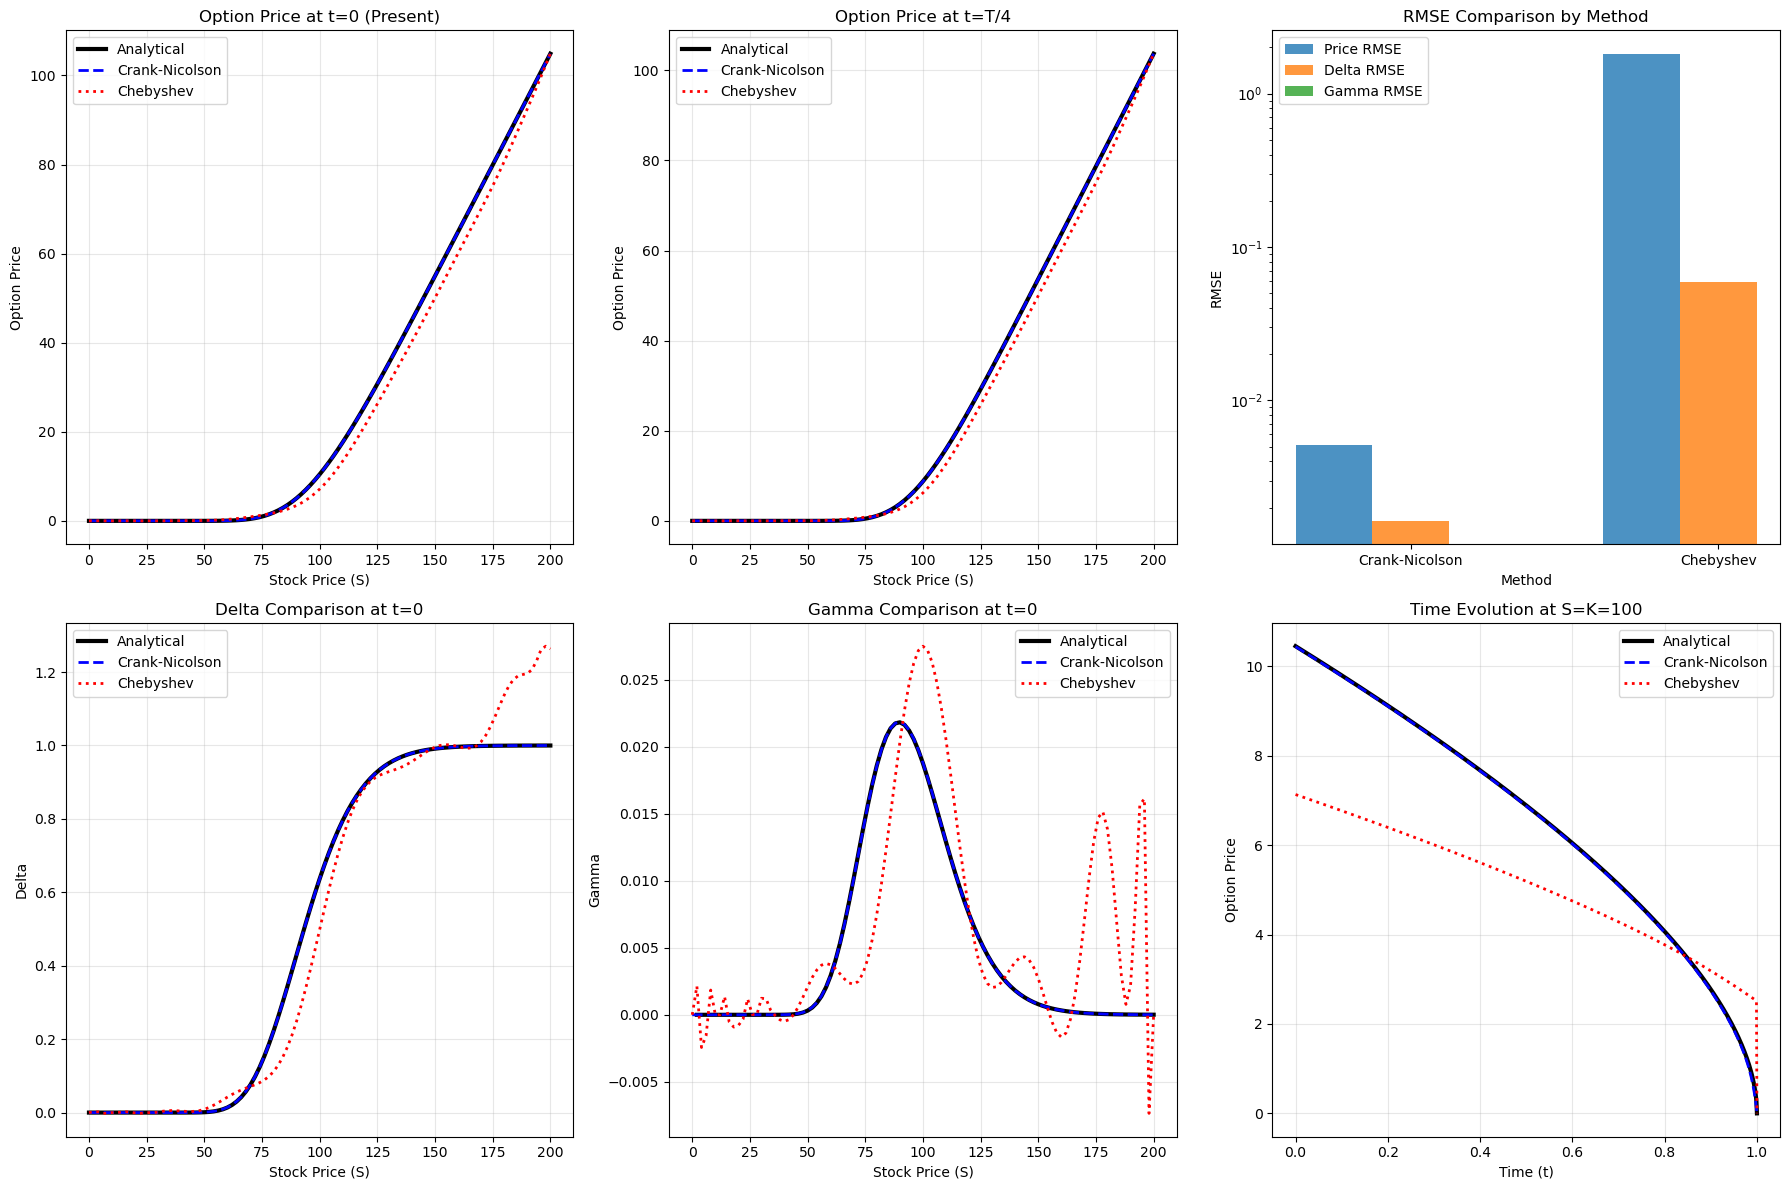


SUMMARY AND CONCLUSIONS

Based on the analysis with 101×1001 grid points:

1. ACCURACY RANKING (by RMSE):
   Option Prices:
     Best:  Crank-Nicolson  (RMSE: 0.00513631)
     2nd:   Chebyshev      (RMSE: 1.81886781)

   Delta (First Derivative):
     Best:  Crank-Nicolson  (RMSE: 0.00163800)
     2nd:   Chebyshev      (RMSE: 0.05947751)

   Gamma (Second Derivative):
     Best:  Chebyshev      (RMSE: nan)
     2nd:   Crank-Nicolson (RMSE: nan)

2. METHOD CHARACTERISTICS:
   Crank-Nicolson:
     + Stable and well-established
     + Good overall accuracy
     - May suffer from numerical diffusion
     - Limited to grid-based approximation

   Chebyshev Polynomial:
     + Spectral accuracy (exponential convergence)
     + Smooth approximation everywhere
     + Excellent for smooth solutions
     - May have issues with discontinuities
     - Computational complexity for derivatives

3. RELATIVE PERFORMANCE:
   Price RMSE difference:  99.7%
   Delta RMSE difference:  97.2%
   Gamma RMSE d

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Loading all CSV files
analytic_price = np.loadtxt("../data/output_analytic.csv", delimiter=",")
cn_price = np.loadtxt("../data/output_cn.csv", delimiter=",")
cheb_price = np.loadtxt("../data/output_cheb.csv", delimiter=",")

analytic_delta = np.loadtxt("../data/delta_analytic.csv", delimiter=",")
cn_delta = np.loadtxt("../data/delta_cn.csv", delimiter=",")
cheb_delta = np.loadtxt("../data/delta_cheb.csv", delimiter=",")

analytic_gamma = np.loadtxt("../data/gamma_analytic.csv", delimiter=",")
cn_gamma = np.loadtxt("../data/gamma_cn.csv", delimiter=",")
cheb_gamma = np.loadtxt("../data/gamma_cheb.csv", delimiter=",")

# Creating axes (should match OptionParams in C++)
Nt, Nx = analytic_price.shape[0] - 1, analytic_price.shape[1] - 1
T, S_max = 1.0, 200
t = np.linspace(0, T, Nt + 1)
S = np.linspace(0, S_max, Nx + 1)

# Create meshgrid for 3D plots
T_mesh, S_mesh = np.meshgrid(t, S, indexing='ij')

# =============================================================================
# COMPREHENSIVE COMPARISON PLOTS
# =============================================================================

fig = plt.figure(figsize=(24, 18))

# Option Prices - 3D Surface Plots
ax1 = fig.add_subplot(4, 4, 1, projection='3d')
ax1.plot_surface(S_mesh, T_mesh, analytic_price, cmap='viridis', alpha=0.8)
ax1.set_title("Analytical (Black-Scholes)\nOption Price")
ax1.set_xlabel("Stock Price (S)")
ax1.set_ylabel("Time (t)")
ax1.set_zlabel("Option Price")

ax2 = fig.add_subplot(4, 4, 2, projection='3d')
ax2.plot_surface(S_mesh, T_mesh, cn_price, cmap='plasma', alpha=0.8)
ax2.set_title("Crank-Nicolson FDM\nOption Price")
ax2.set_xlabel("Stock Price (S)")
ax2.set_ylabel("Time (t)")
ax2.set_zlabel("Option Price")

ax3 = fig.add_subplot(4, 4, 3, projection='3d')
ax3.plot_surface(S_mesh, T_mesh, cheb_price, cmap='coolwarm', alpha=0.8)
ax3.set_title("Chebyshev Polynomial\nOption Price")
ax3.set_xlabel("Stock Price (S)")
ax3.set_ylabel("Time (t)")
ax3.set_zlabel("Option Price")

# Error Analysis - Option Prices
cn_price_error = np.abs(cn_price - analytic_price)
cheb_price_error = np.abs(cheb_price - analytic_price)

ax4 = fig.add_subplot(4, 4, 4)
im1 = ax4.imshow(cn_price_error, cmap="hot", aspect="auto", origin='lower')
ax4.set_title("CN Price Error\n|CN - Analytical|")
ax4.set_xlabel("Stock Price Index")
ax4.set_ylabel("Time Index")
plt.colorbar(im1, ax=ax4, shrink=0.6)

# Delta Comparison
ax5 = fig.add_subplot(4, 4, 5, projection='3d')
ax5.plot_surface(S_mesh, T_mesh, analytic_delta, cmap='RdYlBu', alpha=0.8)
ax5.set_title("Analytical Delta")
ax5.set_xlabel("Stock Price (S)")
ax5.set_ylabel("Time (t)")
ax5.set_zlabel("Delta")

ax6 = fig.add_subplot(4, 4, 6, projection='3d')
ax6.plot_surface(S_mesh, T_mesh, cn_delta, cmap='RdYlGn', alpha=0.8)
ax6.set_title("CN Delta")
ax6.set_xlabel("Stock Price (S)")
ax6.set_ylabel("Time (t)")
ax6.set_zlabel("Delta")

ax7 = fig.add_subplot(4, 4, 7, projection='3d')
ax7.plot_surface(S_mesh, T_mesh, cheb_delta, cmap='magma', alpha=0.8)
ax7.set_title("Chebyshev Delta")
ax7.set_xlabel("Stock Price (S)")
ax7.set_ylabel("Time (t)")
ax7.set_zlabel("Delta")

# Delta Error Analysis
cn_delta_error = np.abs(cn_delta - analytic_delta)
cheb_delta_error = np.abs(cheb_delta - analytic_delta)

ax8 = fig.add_subplot(4, 4, 8)
im2 = ax8.imshow(cn_delta_error, cmap="hot", aspect="auto", origin='lower')
ax8.set_title("CN Delta Error")
ax8.set_xlabel("Stock Price Index")
ax8.set_ylabel("Time Index")
plt.colorbar(im2, ax=ax8, shrink=0.6)

# Gamma Comparison
ax9 = fig.add_subplot(4, 4, 9, projection='3d')
ax9.plot_surface(S_mesh, T_mesh, analytic_gamma, cmap='inferno', alpha=0.8)
ax9.set_title("Analytical Gamma")
ax9.set_xlabel("Stock Price (S)")
ax9.set_ylabel("Time (t)")
ax9.set_zlabel("Gamma")

ax10 = fig.add_subplot(4, 4, 10, projection='3d')
ax10.plot_surface(S_mesh, T_mesh, cn_gamma, cmap='viridis', alpha=0.8)
ax10.set_title("CN Gamma")
ax10.set_xlabel("Stock Price (S)")
ax10.set_ylabel("Time (t)")
ax10.set_zlabel("Gamma")

ax11 = fig.add_subplot(4, 4, 11, projection='3d')
ax11.plot_surface(S_mesh, T_mesh, cheb_gamma, cmap='plasma', alpha=0.8)
ax11.set_title("Chebyshev Gamma")
ax11.set_xlabel("Stock Price (S)")
ax11.set_ylabel("Time (t)")
ax11.set_zlabel("Gamma")

# Gamma Error Analysis
cn_gamma_error = np.abs(cn_gamma - analytic_gamma)
cheb_gamma_error = np.abs(cheb_gamma - analytic_gamma)

ax12 = fig.add_subplot(4, 4, 12)
im3 = ax12.imshow(cn_gamma_error, cmap="hot", aspect="auto", origin='lower')
ax12.set_title("CN Gamma Error")
ax12.set_xlabel("Stock Price Index")
ax12.set_ylabel("Time Index")
plt.colorbar(im3, ax=ax12, shrink=0.6)

# Chebyshev Error Heatmaps
ax13 = fig.add_subplot(4, 4, 13)
im4 = ax13.imshow(cheb_price_error, cmap="hot", aspect="auto", origin='lower')
ax13.set_title("Chebyshev Price Error\n|Cheb - Analytical|")
ax13.set_xlabel("Stock Price Index")
ax13.set_ylabel("Time Index")
plt.colorbar(im4, ax=ax13, shrink=0.6)

ax14 = fig.add_subplot(4, 4, 14)
im5 = ax14.imshow(cheb_delta_error, cmap="hot", aspect="auto", origin='lower')
ax14.set_title("Chebyshev Delta Error")
ax14.set_xlabel("Stock Price Index")
ax14.set_ylabel("Time Index")
plt.colorbar(im5, ax=ax14, shrink=0.6)

ax15 = fig.add_subplot(4, 4, 15)
im6 = ax15.imshow(cheb_gamma_error, cmap="hot", aspect="auto", origin='lower')
ax15.set_title("Chebyshev Gamma Error")
ax15.set_xlabel("Stock Price Index")
ax15.set_ylabel("Time Index")
plt.colorbar(im6, ax=ax15, shrink=0.6)

# Method Comparison at t=0
ax16 = fig.add_subplot(4, 4, 16)
ax16.plot(S, analytic_price[0, :], 'k-', label='Analytical', linewidth=3)
ax16.plot(S, cn_price[0, :], 'b--', label='Crank-Nicolson', linewidth=2)
ax16.plot(S, cheb_price[0, :], 'r:', label='Chebyshev', linewidth=2)
ax16.set_xlabel('Stock Price (S)')
ax16.set_ylabel('Option Price')
ax16.set_title('Method Comparison at t=0')
ax16.legend()
ax16.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# DETAILED ERROR ANALYSIS AND STATISTICS
# =============================================================================

print("="*70)
print("COMPREHENSIVE ERROR ANALYSIS")
print("="*70)

# Option Price Errors
print("\n1. OPTION PRICE ERRORS:")
print("-" * 40)

# Crank-Nicolson errors
cn_price_max = np.max(cn_price_error)
cn_price_mean = np.mean(cn_price_error)
cn_price_rmse = np.sqrt(np.mean(cn_price_error**2))
cn_price_rel = np.mean(cn_price_error / (analytic_price + 1e-10))

print(f"Crank-Nicolson vs Analytical:")
print(f"  Max Absolute Error:     {cn_price_max:.8f}")
print(f"  Mean Absolute Error:    {cn_price_mean:.8f}")
print(f"  RMSE:                   {cn_price_rmse:.8f}")
print(f"  Mean Relative Error:    {cn_price_rel:.8f}")

# Chebyshev errors
cheb_price_max = np.max(cheb_price_error)
cheb_price_mean = np.mean(cheb_price_error)
cheb_price_rmse = np.sqrt(np.mean(cheb_price_error**2))
cheb_price_rel = np.mean(cheb_price_error / (analytic_price + 1e-10))

print(f"\nChebyshev vs Analytical:")
print(f"  Max Absolute Error:     {cheb_price_max:.8f}")
print(f"  Mean Absolute Error:    {cheb_price_mean:.8f}")
print(f"  RMSE:                   {cheb_price_rmse:.8f}")
print(f"  Mean Relative Error:    {cheb_price_rel:.8f}")

# Delta Errors
print("\n2. DELTA (∂V/∂S) ERRORS:")
print("-" * 40)

cn_delta_max = np.max(cn_delta_error)
cn_delta_mean = np.mean(cn_delta_error)
cn_delta_rmse = np.sqrt(np.mean(cn_delta_error**2))

print(f"Crank-Nicolson vs Analytical:")
print(f"  Max Absolute Error:     {cn_delta_max:.8f}")
print(f"  Mean Absolute Error:    {cn_delta_mean:.8f}")
print(f"  RMSE:                   {cn_delta_rmse:.8f}")

cheb_delta_max = np.max(cheb_delta_error)
cheb_delta_mean = np.mean(cheb_delta_error)
cheb_delta_rmse = np.sqrt(np.mean(cheb_delta_error**2))

print(f"\nChebyshev vs Analytical:")
print(f"  Max Absolute Error:     {cheb_delta_max:.8f}")
print(f"  Mean Absolute Error:    {cheb_delta_mean:.8f}")
print(f"  RMSE:                   {cheb_delta_rmse:.8f}")

# Gamma Errors
print("\n3. GAMMA (∂²V/∂S²) ERRORS:")
print("-" * 40)

cn_gamma_max = np.max(cn_gamma_error)
cn_gamma_mean = np.mean(cn_gamma_error)
cn_gamma_rmse = np.sqrt(np.mean(cn_gamma_error**2))

print(f"Crank-Nicolson vs Analytical:")
print(f"  Max Absolute Error:     {cn_gamma_max:.8f}")
print(f"  Mean Absolute Error:    {cn_gamma_mean:.8f}")
print(f"  RMSE:                   {cn_gamma_rmse:.8f}")

cheb_gamma_max = np.max(cheb_gamma_error)
cheb_gamma_mean = np.mean(cheb_gamma_error)
cheb_gamma_rmse = np.sqrt(np.mean(cheb_gamma_error**2))

print(f"\nChebyshev vs Analytical:")
print(f"  Max Absolute Error:     {cheb_gamma_max:.8f}")
print(f"  Mean Absolute Error:    {cheb_gamma_mean:.8f}")
print(f"  RMSE:                   {cheb_gamma_rmse:.8f}")

# =============================================================================
# CROSS-SECTIONAL ANALYSIS
# =============================================================================

fig2, axes = plt.subplots(2, 3, figsize=(18, 12))

# Price comparison at different times
times_to_plot = [0, len(t)//4, len(t)//2, 3*len(t)//4]
time_labels = ['t=0 (Present)', 't=T/4', 't=T/2', 't=3T/4']

for i, (time_idx, time_label) in enumerate(zip(times_to_plot[:2], time_labels[:2])):
    ax = axes[0, i]
    ax.plot(S, analytic_price[time_idx, :], 'k-', label='Analytical', linewidth=3)
    ax.plot(S, cn_price[time_idx, :], 'b--', label='Crank-Nicolson', linewidth=2)
    ax.plot(S, cheb_price[time_idx, :], 'r:', label='Chebyshev', linewidth=2)
    ax.set_xlabel('Stock Price (S)')
    ax.set_ylabel('Option Price')
    ax.set_title(f'Option Price at {time_label}')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Error comparison bar chart
ax = axes[0, 2]
methods = ['Crank-Nicolson', 'Chebyshev']
price_rmse = [cn_price_rmse, cheb_price_rmse]
delta_rmse = [cn_delta_rmse, cheb_delta_rmse]
gamma_rmse = [cn_gamma_rmse, cheb_gamma_rmse]

x = np.arange(len(methods))
width = 0.25

bars1 = ax.bar(x - width, price_rmse, width, label='Price RMSE', alpha=0.8)
bars2 = ax.bar(x, delta_rmse, width, label='Delta RMSE', alpha=0.8)
bars3 = ax.bar(x + width, gamma_rmse, width, label='Gamma RMSE', alpha=0.8)

ax.set_xlabel('Method')
ax.set_ylabel('RMSE')
ax.set_title('RMSE Comparison by Method')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()
ax.set_yscale('log')  # Log scale due to different magnitudes

# Delta and Gamma comparisons at t=0
ax = axes[1, 0]
ax.plot(S, analytic_delta[0, :], 'k-', label='Analytical', linewidth=3)
ax.plot(S, cn_delta[0, :], 'b--', label='Crank-Nicolson', linewidth=2)
ax.plot(S, cheb_delta[0, :], 'r:', label='Chebyshev', linewidth=2)
ax.set_xlabel('Stock Price (S)')
ax.set_ylabel('Delta')
ax.set_title('Delta Comparison at t=0')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1, 1]
ax.plot(S, analytic_gamma[0, :], 'k-', label='Analytical', linewidth=3)
ax.plot(S, cn_gamma[0, :], 'b--', label='Crank-Nicolson', linewidth=2)
ax.plot(S, cheb_gamma[0, :], 'r:', label='Chebyshev', linewidth=2)
ax.set_xlabel('Stock Price (S)')
ax.set_ylabel('Gamma')
ax.set_title('Gamma Comparison at t=0')
ax.legend()
ax.grid(True, alpha=0.3)

# Time evolution at the money (S=K)
K_idx = int(100 * Nx / S_max)  # K=100, find closest index
ax = axes[1, 2]
ax.plot(t, analytic_price[:, K_idx], 'k-', label='Analytical', linewidth=3)
ax.plot(t, cn_price[:, K_idx], 'b--', label='Crank-Nicolson', linewidth=2)
ax.plot(t, cheb_price[:, K_idx], 'r:', label='Chebyshev', linewidth=2)
ax.set_xlabel('Time (t)')
ax.set_ylabel('Option Price')
ax.set_title(f'Time Evolution at S=K={100}')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# SUMMARY AND CONCLUSIONS
# =============================================================================

print("\n" + "="*70)
print("SUMMARY AND CONCLUSIONS")
print("="*70)

print(f"\nBased on the analysis with {Nx+1}×{Nt+1} grid points:")
print("\n1. ACCURACY RANKING (by RMSE):")
print("   Option Prices:")
if cn_price_rmse < cheb_price_rmse:
    print(f"     Best:  Crank-Nicolson  (RMSE: {cn_price_rmse:.8f})")
    print(f"     2nd:   Chebyshev      (RMSE: {cheb_price_rmse:.8f})")
else:
    print(f"     Best:  Chebyshev      (RMSE: {cheb_price_rmse:.8f})")
    print(f"     2nd:   Crank-Nicolson (RMSE: {cn_price_rmse:.8f})")

print("\n   Delta (First Derivative):")
if cn_delta_rmse < cheb_delta_rmse:
    print(f"     Best:  Crank-Nicolson  (RMSE: {cn_delta_rmse:.8f})")
    print(f"     2nd:   Chebyshev      (RMSE: {cheb_delta_rmse:.8f})")
else:
    print(f"     Best:  Chebyshev      (RMSE: {cheb_delta_rmse:.8f})")
    print(f"     2nd:   Crank-Nicolson (RMSE: {cn_delta_rmse:.8f})")

print("\n   Gamma (Second Derivative):")
if cn_gamma_rmse < cheb_gamma_rmse:
    print(f"     Best:  Crank-Nicolson  (RMSE: {cn_gamma_rmse:.8f})")
    print(f"     2nd:   Chebyshev      (RMSE: {cheb_gamma_rmse:.8f})")
else:
    print(f"     Best:  Chebyshev      (RMSE: {cheb_gamma_rmse:.8f})")
    print(f"     2nd:   Crank-Nicolson (RMSE: {cn_gamma_rmse:.8f})")

print("\n2. METHOD CHARACTERISTICS:")
print("   Crank-Nicolson:")
print("     + Stable and well-established")
print("     + Good overall accuracy")
print("     - May suffer from numerical diffusion")
print("     - Limited to grid-based approximation")

print("\n   Chebyshev Polynomial:")
print("     + Spectral accuracy (exponential convergence)")
print("     + Smooth approximation everywhere")
print("     + Excellent for smooth solutions")
print("     - May have issues with discontinuities")
print("     - Computational complexity for derivatives")

print(f"\n3. RELATIVE PERFORMANCE:")
improvement_price = abs(cn_price_rmse - cheb_price_rmse) / max(cn_price_rmse, cheb_price_rmse) * 100
improvement_delta = abs(cn_delta_rmse - cheb_delta_rmse) / max(cn_delta_rmse, cheb_delta_rmse) * 100
improvement_gamma = abs(cn_gamma_rmse - cheb_gamma_rmse) / max(cn_gamma_rmse, cheb_gamma_rmse) * 100

print(f"   Price RMSE difference:  {improvement_price:.1f}%")
print(f"   Delta RMSE difference:  {improvement_delta:.1f}%")
print(f"   Gamma RMSE difference:  {improvement_gamma:.1f}%")

print("\n" + "="*70)

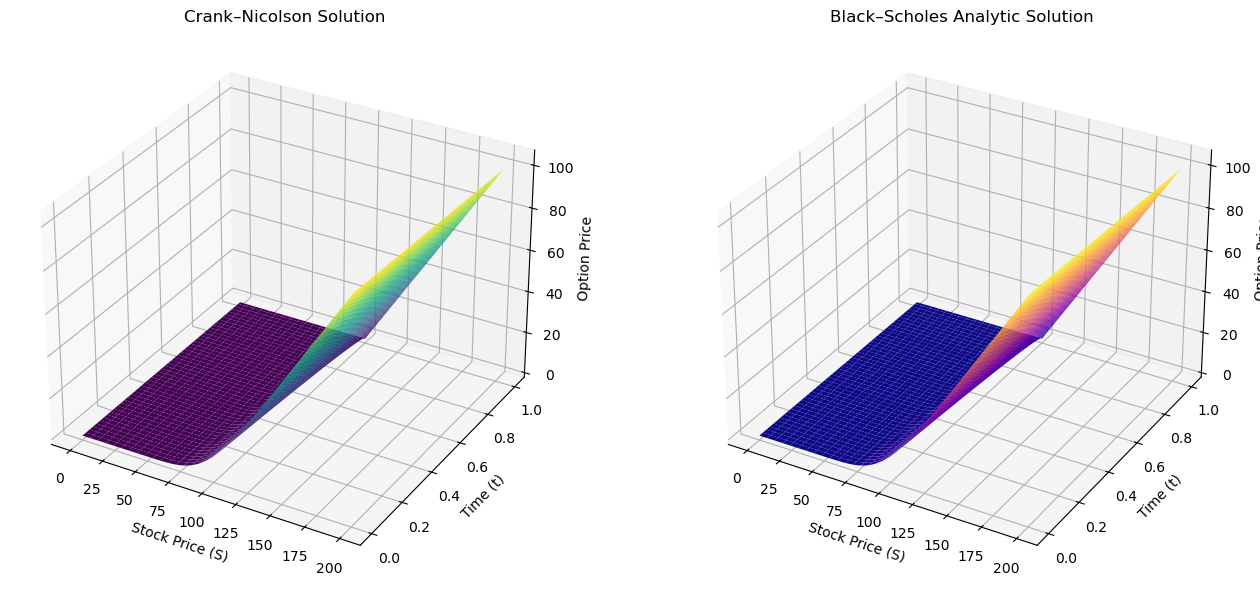

In [4]:


# Load CSVs (Finite difference (fd) and Analytic (bs) grids come from the c++ code in cpp_implementation)
fd = np.loadtxt("../data/output_fd.csv", delimiter=",") # Finite Difference
bs = np.loadtxt("../data/output_analytic.csv", delimiter=",") # Analytic Solution

# Create axes
Nt, Nx = fd.shape[0] - 1, fd.shape[1] - 1
T, S_max = 1.0, 200  # Should match OptionParams in C++

t = np.linspace(0, T, Nt + 1)            # time axis
S = np.linspace(0, S_max, Nx + 1)        # stock price axis

# Create meshgrid
T_mesh, S_mesh = np.meshgrid(t, S, indexing='ij')

# Plot both surfaces
fig = plt.figure(figsize=(14, 6))

# Plot Crank-Nicolson
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(S_mesh, T_mesh, fd, cmap='viridis')
ax1.set_title("Crank–Nicolson Solution")
ax1.set_xlabel("Stock Price (S)")
ax1.set_ylabel("Time (t)")
ax1.set_zlabel("Option Price")

# Plot Analytic
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(S_mesh, T_mesh, bs, cmap='plasma')
ax2.set_title("Black–Scholes Analytic Solution")
ax2.set_xlabel("Stock Price (S)")
ax2.set_ylabel("Time (t)")
ax2.set_zlabel("Option Price")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Absolute Error Between CN and Analytic')

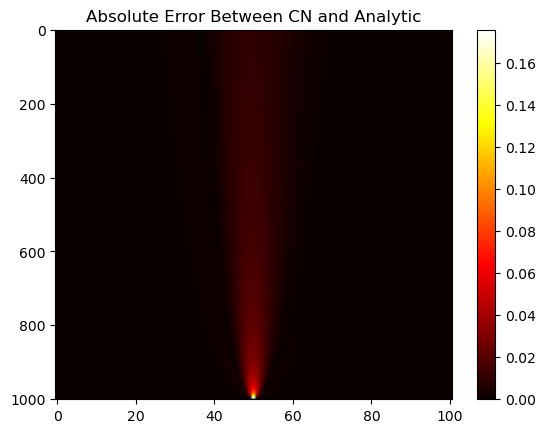

In [5]:
diff = fd - bs # Error measured as subtraction of corresponding gridpoints

plt.imshow(np.abs(diff), cmap="hot", aspect="auto")
plt.colorbar()
plt.title("Absolute Error Between CN and Analytic")